<a href="https://colab.research.google.com/github/codyub/ESAA/blob/main/22_09_30_%EB%AF%B8%EB%8B%88%ED%94%84%EB%A1%9C%EC%A0%9D%ED%8A%B8.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[YB 미니 프로젝트(1) 조별 과제 공지] 

- 관련 사이트: https://dacon.io/competitions/open/235536/data

​

- 과제: 지금까지 배운 pandas 코드를 통해 유의미한 결과 10개 이상 출력하고, 그래프 그리기 (데이터 전처리는 예시 참고)

​

- 조건: 변수 2개 이상 연결한 결과값 포함

​

- 위의 주소에서 데이터를 다운받은 후, 사이트의 내용을 참고하여 새로 알고자 하는 내용으로 데이터를 분석하시면 됩니다. 분석은 train.csv 파일만을 이용하시면 됩니다. 데이터 전처리 및 분석 예시는 아래의 첨부파일을 참고해주세요.

In [1]:
from google.colab import files
file_uploaded = files.upload()

Saving movies_train.csv to movies_train.csv


In [2]:
import io

In [3]:
import pandas as pd 
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic') #matplotlib 한글 깨짐 방지

import warnings
warnings.filterwarnings(action='ignore')

In [4]:
train = pd.read_csv(io.BytesIO(file_uploaded['movies_train.csv']))
train.head(3) # 데이터 프레임 상위 3개의 행만 반환. 디폴트 값은 5

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083


In [5]:
train.head(100)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.50,2,387,3,7072501
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.25,4,343,4,6959083
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.00,2,20,6,217866
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.00,1,251,2,483387
...,...,...,...,...,...,...,...,...,...,...,...,...
95,경복,KT&G 상상마당,드라마,2013-07-11,69,15세 관람가,최시형,NaN,0,17,2,651
96,잉투기,무비꼴라쥬,액션,2013-11-14,98,15세 관람가,엄태화,NaN,0,65,3,17341
97,사이비,NEW,애니메이션,2013-11-21,100,청소년 관람불가,연상호,NaN,0,136,4,22525
98,두 개의 달,롯데엔터테인먼트,미스터리,2012-07-12,86,15세 관람가,김동빈,321.00,1,167,4,426706


데이터 요약

In [6]:
print(train.shape)

(600, 12)


In [7]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   title           600 non-null    object 
 1   distributor     600 non-null    object 
 2   genre           600 non-null    object 
 3   release_time    600 non-null    object 
 4   time            600 non-null    int64  
 5   screening_rat   600 non-null    object 
 6   director        600 non-null    object 
 7   dir_prev_bfnum  270 non-null    float64
 8   dir_prev_num    600 non-null    int64  
 9   num_staff       600 non-null    int64  
 10  num_actor       600 non-null    int64  
 11  box_off_num     600 non-null    int64  
dtypes: float64(1), int64(5), object(6)
memory usage: 56.4+ KB


In [8]:
pd.options.display.float_format = '{:.1f}'.format

In [9]:
train.describe()

,time,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
count,600.0,270.0,600.0,600.0,600.0,600.0
mean,100.9,1050442.9,0.9,151.1,3.7,708181.8
std,18.1,1791408.3,1.2,165.7,2.4,1828005.9
min,45.0,1.0,0.0,0.0,0.0,1.0
25%,89.0,20380.0,0.0,17.0,2.0,1297.2
50%,100.0,478423.6,0.0,82.5,3.0,12591.0
75%,114.0,1286568.6,2.0,264.0,4.0,479886.8
max,180.0,17615314.0,5.0,869.0,25.0,14262766.0


# 결측치 확인 및 데이터 전처리

In [10]:
train.isna().sum() # 결측치 개수

title               0
distributor         0
genre               0
release_time        0
time                0
screening_rat       0
director            0
dir_prev_bfnum    330
dir_prev_num        0
num_staff           0
num_actor           0
box_off_num         0
dtype: int64

In [11]:
# 결측값의 특성 확인
train[train['dir_prev_bfnum'].isna()].head(3)

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,NaN,0,91,2,23398
6,길위에서,백두대간,다큐멘터리,2013-05-23,104,전체 관람가,이창재,NaN,0,32,5,53526
8,"1789, 바스티유의 연인들",유니버설픽쳐스인터내셔널코리아,뮤지컬,2014-09-18,129,전체 관람가,정성복,NaN,0,3,5,4778


In [12]:
print(train[train['dir_prev_bfnum'].isna()]['dir_prev_num'].sum())

0


train과 test 모두 dir_prev_bfnum이 결측값으로 존재하는 데이터들은 전부 dir_prev_num이 0인 영화들이다. 즉, 감독의 이전작품이 존재 하지 않은 경우이다. 따라서 dir_prev_bfnum에 있는 결측값은 전부 0으로 채운다.

In [13]:
train['dir_prev_bfnum'].fillna(0, inplace=True)

release_time은 시간에 관련된 데이터인데 int형으로 인식되고 있다. release_time을 datetime형식으로 변환한다.

In [14]:
train['release_time']=pd.to_datetime(train['release_time'])

# 1)	배급사별 많이 내는 장르가 있는가?(장르별로 배급사 수 확인, 특화장르가 있는 배급사가 있는지 존재 확인) 


In [15]:
plt.rcParams['font.family'] = 'NanumGothic'

In [16]:
pd.set_option('display.max_rows', None)
train.groupby(['distributor','genre'])['genre'].count()

# 기준: 5회 이상
# (주) 영화사조제: 드라마        7
# (주) 케이알씨지: 멜로/로맨스    12
# (주)NEW:드라마       16
# (주)마운틴픽쳐스:  다큐멘터리      8, 드라마       11
# (주)쇼박스: 느와르        8 드라마        8
# CJ 엔터테인먼트: 드라마       20, 공포         5,  코미디        5, 멜로/로맨스     6
# KT&G 상상마당: 드라마        5
# 롯데엔터테인먼트: 드라마       14, 멜로/로맨스     8, 코미디        8, 공포         6, 액션         5
# 스폰지: 드라마        6
# 시네마 달:다큐멘터리      6
# 시네마달:다큐멘터리      9
# 영화사 진: 다큐멘터리      5
# 인디스토리: 다큐멘터리      7, 드라마       12

# 결론: 특별히 많이 하는 장르가 존재함. 특히 드라마가 많음. 

distributor      genre 
(주) 브릿지웍스        멜로/로맨스     1
                 코미디        2
(주) 액티버스엔터테인먼트   드라마        1
                 멜로/로맨스     1
(주) 영화사조제        SF         1
                 드라마        7
                 멜로/로맨스     1
                 뮤지컬        1
(주) 영화제작전원사      드라마        3
(주) 케이알씨지        드라마        2
                 멜로/로맨스    12
(주)JK필름          코미디        1
(주)NEW           SF         1
                 공포         2
                 느와르        2
                 다큐멘터리      1
                 드라마       16
                 멜로/로맨스     2
                 애니메이션      1
                 액션         2
                 코미디        3
(주)고앤고 필름        미스터리       1
(주)노버스엔터테인먼트     코미디        1
(주)대명문화공장        드라마        1
(주)더픽쳐스          SF         1
(주)두타연           드라마        1
(주)드림팩트엔터테인먼트    느와르        1
(주)랠리버튼          SF         1
(주)레인보우 팩토리      드라마        1
(주)로드하우스         멜로/로맨스     1
(주)리틀빅픽처스        드라마        1
                 애니메이션      1
(주)마운틴픽쳐스       

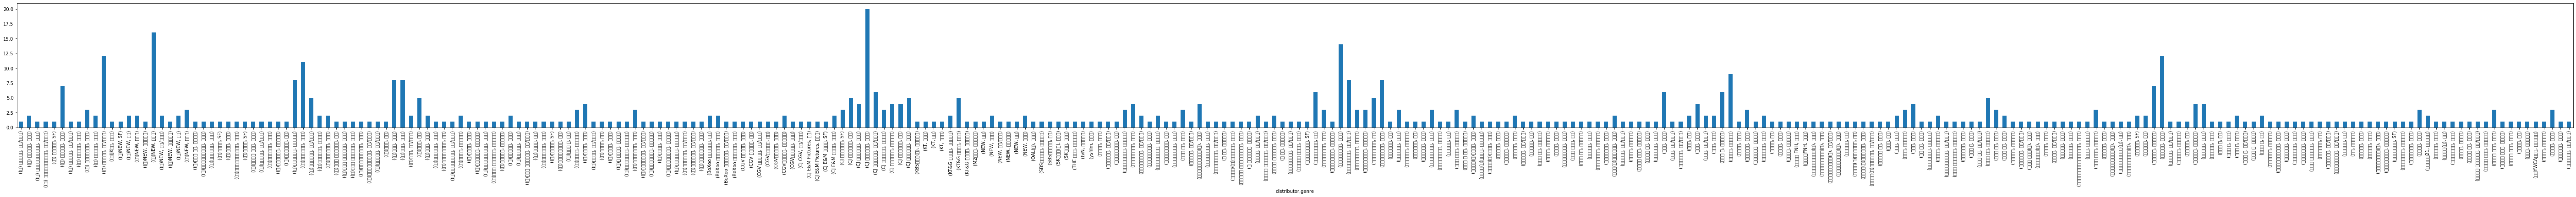

In [17]:
# from matplotlib import font_manager, rc
# f_path = "Candara.ttf"
# font_name = font_manager.FontProperties(fname=f_path).get_name()
# rc('font', family=font_name)

train.groupby(['distributor','genre'])['genre'].count().plot(kind='bar',figsize=(100,5))
# 그래프는 나오지만 글이 너무 많아서 글자가 깨짐, 하지만 배급사마다 특정 장르를 많이 하긴 함. 

# 2)	연도별 배급사의 영화 개봉 수

In [18]:
 str(train['release_time'][0])[:4]

'2012'

In [19]:
len(train)

600

In [20]:
k=[]
for i in range(len(train)):
  k.append(str(train['release_time'][i])[:4])

train['release_time_year'] = k
train.head()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_year
0,개들의 전쟁,롯데엔터테인먼트,액션,2012-11-22,96,청소년 관람불가,조병옥,0.0,0,91,2,23398,2012
1,내부자들,(주)쇼박스,느와르,2015-11-19,130,청소년 관람불가,우민호,1161602.5,2,387,3,7072501,2015
2,은밀하게 위대하게,(주)쇼박스,액션,2013-06-05,123,15세 관람가,장철수,220775.2,4,343,4,6959083,2013
3,나는 공무원이다,(주)NEW,코미디,2012-07-12,101,전체 관람가,구자홍,23894.0,2,20,6,217866,2012
4,불량남녀,쇼박스(주)미디어플렉스,코미디,2010-11-04,108,15세 관람가,신근호,1.0,1,251,2,483387,2010


In [21]:
train.groupby(['release_time_year']).count()

,title,distributor,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num
release_time_year,,,,,,,,,,,,
2010,90,90,90,90,90,90,90,90,90,90,90,90
2011,80,80,80,80,80,80,80,80,80,80,80,80
2012,88,88,88,88,88,88,88,88,88,88,88,88
2013,95,95,95,95,95,95,95,95,95,95,95,95
2014,127,127,127,127,127,127,127,127,127,127,127,127
2015,120,120,120,120,120,120,120,120,120,120,120,120


In [22]:
train.groupby(['distributor']).count()

,title,genre,release_time,time,screening_rat,director,dir_prev_bfnum,dir_prev_num,num_staff,num_actor,box_off_num,release_time_year
distributor,,,,,,,,,,,,
(주) 브릿지웍스,3,3,3,3,3,3,3,3,3,3,3,3
(주) 액티버스엔터테인먼트,2,2,2,2,2,2,2,2,2,2,2,2
(주) 영화사조제,10,10,10,10,10,10,10,10,10,10,10,10
(주) 영화제작전원사,3,3,3,3,3,3,3,3,3,3,3,3
(주) 케이알씨지,14,14,14,14,14,14,14,14,14,14,14,14
(주)JK필름,1,1,1,1,1,1,1,1,1,1,1,1
(주)NEW,30,30,30,30,30,30,30,30,30,30,30,30
(주)고앤고 필름,1,1,1,1,1,1,1,1,1,1,1,1
(주)노버스엔터테인먼트,1,1,1,1,1,1,1,1,1,1,1,1


In [26]:
pd.set_option('display.max_rows', None) 
train.groupby(['release_time_year','distributor'])['distributor'].count()
# 2010년:  CJ 엔터테인먼트          10
# 2011년: 롯데엔터테인먼트           11
# 2012년: 롯데엔터테인먼트            9
# 2013년: CJ 엔터테인먼트          13
# 2014년: 롯데엔터테인먼트           12
# 2015년: CJ 엔터테인먼트          11

release_time_year  distributor    
2010               (주) 케이알씨지           1
                   (주)JK필름             1
                   (주)NEW              3
                   (주)마운틴픽쳐스           3
                   (주)쇼박스              2
                   (주)키노아이             2
                   CJ CGV              1
                   CJ 엔터테인먼트          10
                   KT                  2
                   KT&G 상상마당           2
                   NEW                 2
                   SK텔레콤(주)            1
                   ysfilm              1
                   건시네마                1
                   나이너스엔터테인먼트(주)       1
                   동국대학교 충무로영상제작센터     1
                   롯데엔터테인먼트            7
                   마노엔터테인먼트            1
                   마운틴 픽처스             3
                   새인컴퍼니               1
                   쇼박스(주)미디어플렉스        1
                   스토리셋                1
                   스폰지                 7
                   시너지

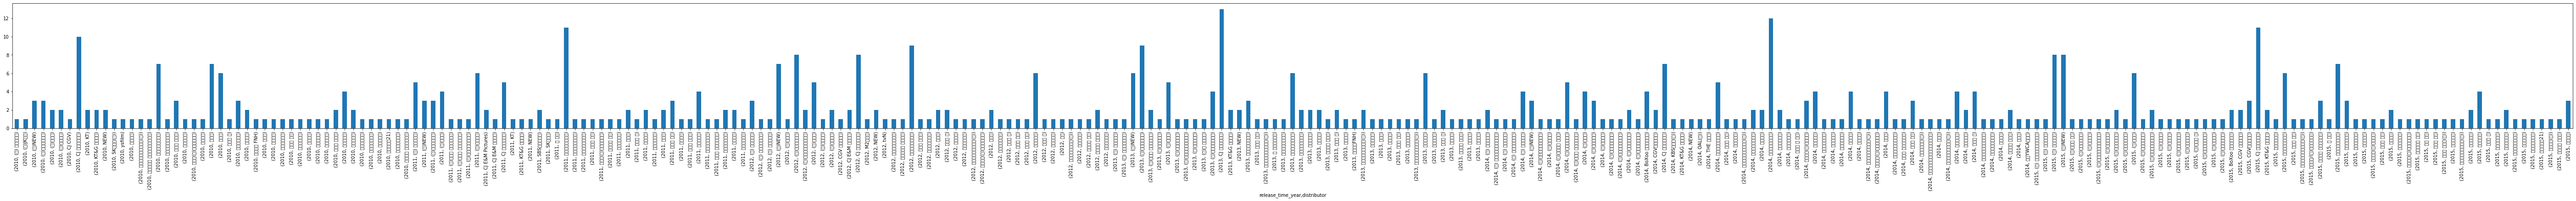

In [25]:
train.groupby(['release_time_year','distributor'])['distributor'].count().plot(kind='bar',figsize=(100,5))